In [419]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import accuracy_score

In [363]:
warnings.filterwarnings("ignore")

In [364]:
df =  pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [365]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [366]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [367]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [368]:
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [369]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [370]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [371]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [372]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [373]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [374]:
df_train =  df

In [375]:
categorical_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Aplicar One-Hot Encoding a las variables categóricas
df = pd.get_dummies(df, columns=categorical_variables)

# Ahora las variables categóricas seleccionadas están codificadas como variables binarias (0 o 1)
print(df.head())

    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Female   
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0           True  \
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0           True   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0          False   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0          False   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0          False   

   Gender_Male  ...  MTRANS_Motorbike  MTRANS_Public_Transportation   
0        False  ...             False                          True  \
1        False  ...             False                          True   
2         True  ...             False                          True   
3         True  ...             False                         False   
4         True  ...             False                          True   

   MTRANS_Walking  NObeyesdad_Insufficient_Weight  NObeyesdad_Normal_Weight   
0           False                           False                      True  \


In [376]:
print(df.head())

    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Female   
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0           True  \
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0           True   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0          False   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0          False   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0          False   

   Gender_Male  ...  MTRANS_Motorbike  MTRANS_Public_Transportation   
0        False  ...             False                          True  \
1        False  ...             False                          True   
2         True  ...             False                          True   
3         True  ...             False                         False   
4         True  ...             False                          True   

   MTRANS_Walking  NObeyesdad_Insufficient_Weight  NObeyesdad_Normal_Weight   
0           False                           False                      True  \


In [377]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                         Age    Height    Weight      FCVC   
Age                                 1.000000 -0.025958  0.202560  0.016291  \
Height                             -0.025958  1.000000  0.463136 -0.038121   
Weight                              0.202560  0.463136  1.000000  0.216125   
FCVC                                0.016291 -0.038121  0.216125  1.000000   
NCP                                -0.043944  0.243672  0.107469  0.042216   
CH2O                               -0.045304  0.213376  0.200575  0.068461   
FAF                                -0.144938  0.294709 -0.051436  0.019939   
TUE                                -0.296931  0.051912 -0.071561 -0.101135   
Gender_Female                      -0.048394 -0.618466 -0.161668  0.274505   
Gender_Male                         0.048394  0.618466  0.161668 -0.274505   
family_history_with_overweight_no  -0.205725 -0.247684 -0.496820 -0.040372   
family_history_with_overweight_yes  0.205725  0.247684  0.496820

<Axes: >

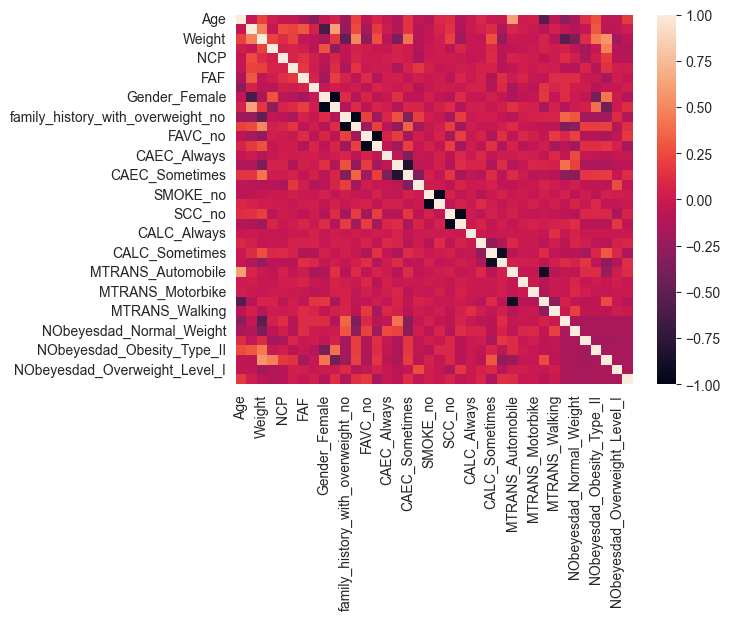

In [378]:
sns.heatmap(df.corr())

In [379]:
categorical_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS' ]


In [380]:
# Seleccionar las características relevantes (variables predictoras) y la variable objetivo
features = df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motor bike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']]
target = df_train['NObeyesdad']

In [381]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [382]:
# Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=300, random_state=None)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [383]:
#predicciones
y_pred = model.predict(X_test)

In [384]:
#Evaluacion del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.9361702127659575


In [385]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [386]:
puntuaciones = cross_val_score(model, features, target, cv=kf)


In [387]:
print("Puntuaciones de validación cruzada:", puntuaciones)
print("Puntuación media de validación cruzada:", puntuaciones.mean())

Puntuaciones de validación cruzada: [0.94799054 0.94312796 0.94312796 0.93838863 0.9549763 ]
Puntuación media de validación cruzada: 0.9455222793631586


In [388]:
cm = confusion_matrix(y_test, y_pred)

In [389]:
cm

array([[54,  2,  0,  0,  0,  0,  0],
       [ 2, 55,  0,  0,  0,  4,  1],
       [ 0,  2, 72,  2,  0,  1,  1],
       [ 0,  0,  1, 57,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  7,  0,  0,  0, 48,  1],
       [ 0,  0,  0,  0,  0,  3, 47]], dtype=int64)

In [390]:
cr =  classification_report(y_test, y_pred)

In [391]:
print(cr)

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.83      0.89      0.86        62
     Obesity_Type_I       0.99      0.92      0.95        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.86      0.86      0.86        56
Overweight_Level_II       0.94      0.94      0.94        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423



**REGRESION LOGISTICA**

In [392]:
modelo = LogisticRegression()

In [393]:
modelo.fit(features, target)

LogisticRegression()

In [394]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [395]:
puntuaciones = cross_val_score(modelo, features, target, cv=kf)

In [396]:
print("Puntuaciones de validación cruzada:", puntuaciones)
print("Puntuación media de validación cruzada:", puntuaciones.mean())


Puntuaciones de validación cruzada: [0.71631206 0.74881517 0.66587678 0.66824645 0.69668246]
Puntuación media de validación cruzada: 0.6991865819636315


In [397]:
y_pred = modelo.predict(X_test)

In [398]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.7257683215130024


In [399]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[53,  3,  0,  0,  0,  0,  0],
       [12, 35,  2,  1,  0,  8,  4],
       [ 0,  0, 44, 11,  5,  3, 15],
       [ 0,  0,  3, 54,  0,  0,  1],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  8,  5,  1,  0, 34,  8],
       [ 0,  3, 12,  2,  0,  9, 24]], dtype=int64)

In [400]:
cr =  classification_report(y_test, y_pred)
print(cr)

                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.95      0.88        56
      Normal_Weight       0.71      0.56      0.63        62
     Obesity_Type_I       0.67      0.56      0.61        78
    Obesity_Type_II       0.78      0.93      0.85        58
   Obesity_Type_III       0.93      1.00      0.96        63
 Overweight_Level_I       0.63      0.61      0.62        56
Overweight_Level_II       0.46      0.48      0.47        50

           accuracy                           0.73       423
          macro avg       0.71      0.73      0.72       423
       weighted avg       0.72      0.73      0.72       423



GAUSSIAN

In [420]:
model_Gaussian  = GaussianNB()

In [421]:
model_Gaussian.fit(features, target)

GaussianNB()

In [422]:
y_pred = model_Gaussian.predict(X_test)

In [423]:
kf =  KFold(n_splits=6, shuffle=True, random_state=None)

In [424]:
puntuaciones = cross_val_score(modelo, features, target, cv=kf)

In [425]:
print("Puntuaciones de validación cruzada:", puntuaciones)
print("Puntuación media de validación cruzada:", puntuaciones.mean())

Puntuaciones de validación cruzada: [0.67613636 0.71306818 0.69034091 0.67613636 0.66761364 0.7008547 ]
Puntuación media de validación cruzada: 0.6873583592333592


In [426]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.5626477541371159


In [427]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  0,  6,  0,  0,  1,  0],
       [36, 12,  4,  0,  0,  4,  6],
       [ 0,  2, 31, 38,  0,  3,  4],
       [ 0,  0,  0, 56,  0,  0,  2],
       [ 0,  0,  0,  0, 63,  0,  0],
       [14,  2, 18,  7,  0,  9,  6],
       [ 2,  1, 16, 13,  0,  0, 18]], dtype=int64)

In [428]:
cr =  classification_report(y_test, y_pred)
print(cr)

                     precision    recall  f1-score   support

Insufficient_Weight       0.49      0.88      0.62        56
      Normal_Weight       0.71      0.19      0.30        62
     Obesity_Type_I       0.41      0.40      0.41        78
    Obesity_Type_II       0.49      0.97      0.65        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.53      0.16      0.25        56
Overweight_Level_II       0.50      0.36      0.42        50

           accuracy                           0.56       423
          macro avg       0.59      0.56      0.52       423
       weighted avg       0.59      0.56      0.52       423

